### Setup

In [64]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Baca data dari CSV
df = pd.read_csv('water_potability.csv')

# Hapus data yang ada nullnya 
df.dropna(inplace = True) 
  
# Tambah nama Kolom
df.columns= ["id","pH","Hardness","Solids","Chloramines","Sulfate","Conductivity",
               "OrganicCarbon","Trihalomethanes","Turbidity","Potability"]

#bikin jadi 2 data berdasarkan kolom Potability
df0 = df[df["Potability"]==0]
df1 = df[df["Potability"]==1]

### Soal 1
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [65]:
#tipe data yang bersifat numerik
accepted_data_type = ["int","float","complex"]

'''
mean 
median 
modus 
standar deviasi 
variansi 
range 
minimum 
maksimum 
kuartil 
IQR
skewness 
kurtosis
'''
print(df.describe())
print("Mean:")
print(df1.mean())
print("")
print("Median")
print(df1.median())
print()
print("Mode:")
for column in df1:
    print('{:<16}'.format(column),end="")
    print('{:>13}'.format(df1[column].mode().loc[0].round(5)))
print("")
print("Standar Deviasi:")
print(df1.std())
print("")
print("Variansi:")
print(df1.var())
print("")
print("Maksimum:")
print(df1.max())
print("")
print("Minimum:")
print(df1.min())
print("")
print("Range:")
print(df1.max()-df1.min())
print("Kuartil 1:")
print(df1.quantile(.25))
print("")
print("Kuartil 2:")
print(df1.quantile(.50))
print("")
print("Kuartil 3:")
print(df1.quantile(.75))
print("")
print("Interquartile Range:")
print(df1.quantile(.75) - df.quantile(.25))
print("")
print("Skewness:")
print(df1.skew())
print("")
print("Kurtosis:")
print(df1.kurt())

'''
Cara Print 2
print("Mean:")
print(df.groupby('Potability').mean())
print("")
'''

                id           pH     Hardness        Solids  Chloramines  \
count  2009.000000  2009.000000  2009.000000   2009.000000  2009.000000   
mean   1006.000000     7.086581   195.960048  21904.616822     7.133862   
std     580.092665     1.572955    32.648709   8627.545029     1.585474   
min       2.000000     0.227499    73.492234    320.942611     1.390871   
25%     504.000000     6.090016   176.736376  15613.160533     6.137757   
50%    1006.000000     7.027297   197.191839  20920.251561     7.140122   
75%    1508.000000     8.052894   216.454108  27172.893573     8.110140   
max    2010.000000    14.000000   317.338124  56488.672413    13.127000   

           Sulfate  Conductivity  OrganicCarbon  Trihalomethanes    Turbidity  \
count  2009.000000   2009.000000    2009.000000      2009.000000  2009.000000   
mean    333.199592    426.508172      14.355910        66.383822     3.969169   
std      41.217984     80.709632       3.325352        16.067261     0.780527   


'\nCara Print 2\nprint("Mean:")\nprint(df.groupby(\'Potability\').mean())\nprint("")\n'

### Soal 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.


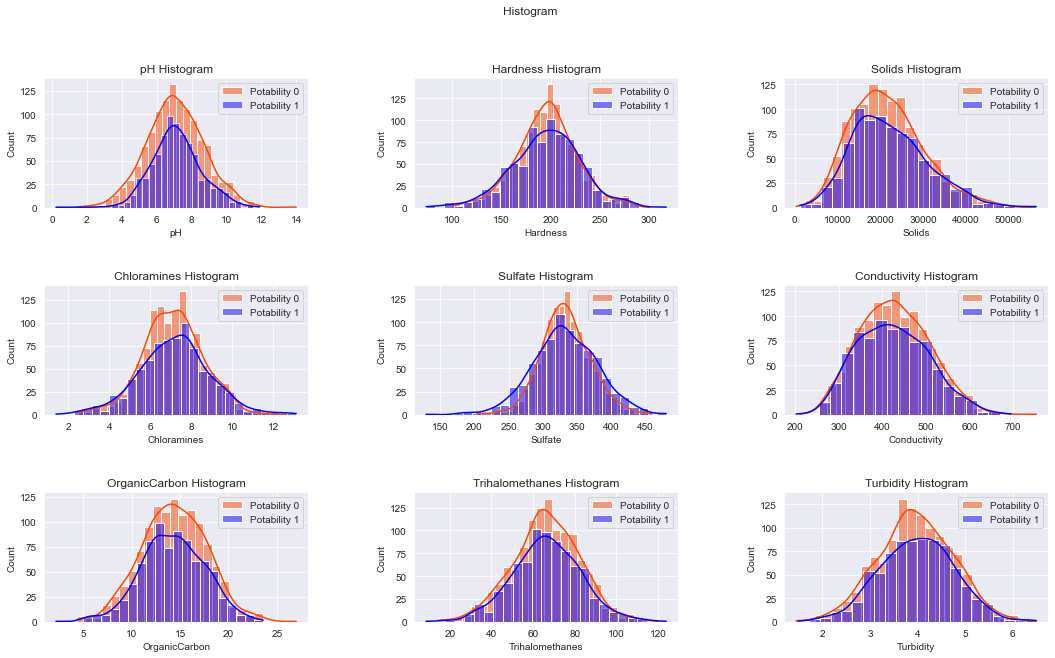

In [66]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
 

fig.suptitle('Histogram')
 
iris = sns.load_dataset("iris")
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.color_palette("rocket_r", as_cmap=True)
        sns.histplot(ax=axes[i//3, i % 3], data=df0, x=cols, color="orangered", label="Potability 0", kde=True).set_title(cols + " Histogram")
        sns.histplot(ax=axes[i//3, i % 3], data=df1, x=cols,color = 'blue' ,label="Potability 1", kde=True)
        axes[i//3, i % 3].legend()
        i += 1
plt.subplots_adjust(hspace=0.6, wspace = 0.4)
plt.legend()
plt.show()

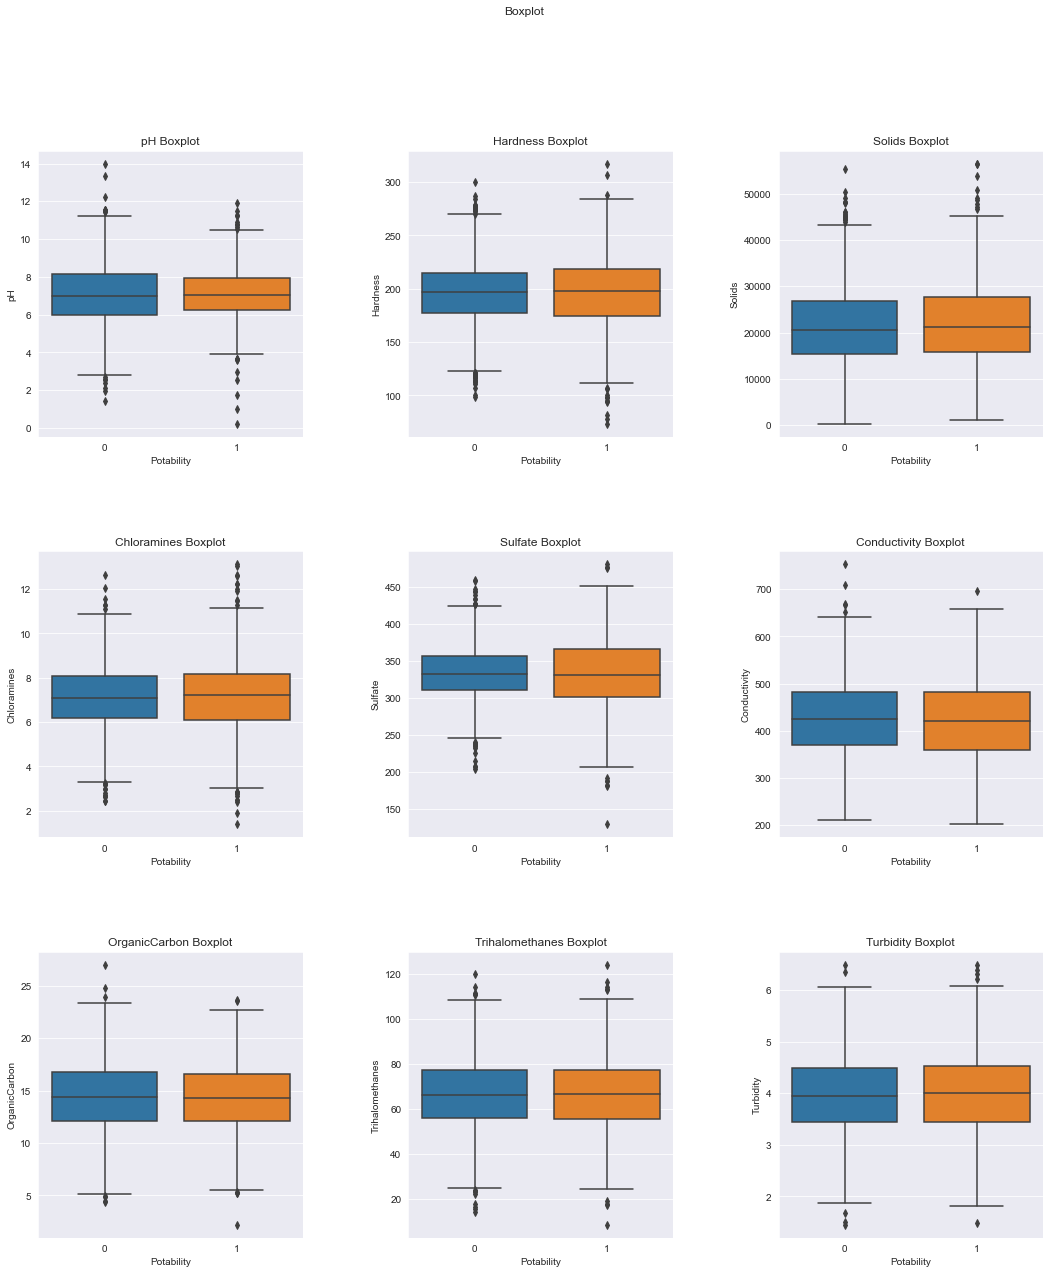

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
 
fig.suptitle('Boxplot')
 
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.boxplot(ax=axes[i//3, i % 3], x="Potability", y=cols, data=df).set_title(cols + " Boxplot")
        i += 1
plt.subplots_adjust(hspace=0.4, wspace = 0.4)


### Soal 3

In [77]:
from scipy.stats import *

def print_result(stat,p):
    print("stat=%.3f, p=%.10f" %(stat, p), end=" ")
    if p>0.05:
        print("Normal")
    else:
        print("Tidak")

for cols in df0:
    print('================='+cols+'================')
    stat, p = shapiro(data)
    print("Shapiro Test : ", end="")
    print_result(stat, p)
    stat, p = normaltest(data)
    print("D'Agostiono Test : ", end="")
    print_result(stat, p)
    stat, p = chisquare(data)
    print("Chi-square Test : ", end="")
    print_result(stat, p)
    stat, p = jarque_bera(data)
    print("Jarque-Bera Test : ", end="")
    print_result(stat, p)
    stat, p = kstest(data,'norm')
    print("Kolmogorov-Smirnov Test : ", end="")
    print_result(stat, p)
    break



=================id================
Shapiro Test : stat=1.000, p=0.7414553761 Normal
D'Agostiono Test : stat=0.143, p=0.9310683041 Normal
Chi-square Test : stat=59098.788, p=0.0000000000 Tidak
Jarque-Bera Test : stat=0.137, p=0.9339972192 Normal
Kolmogorov-Smirnov Test : stat=0.958, p=0.0000000000 Tidak
